## Sub-task 2: Dimensionality Reduction

In [3]:
# imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression


# Read the data from the CSV file
df = pd.read_csv(r"dataset\kc_house_data.csv")

# Check the number of data points in the data set
print("Data Points: ", len(df))

Data Points:  21613


In [4]:
# df.head()
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [7]:
# Standardize the data
scaled_df = StandardScaler().fit_transform(df)

In [8]:
# Apply PCA to reduce the data to three dimensions
pca = PCA(n_components=3)
pca_result = pca.fit_transform(scaled_df)

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2', 'PC3'])

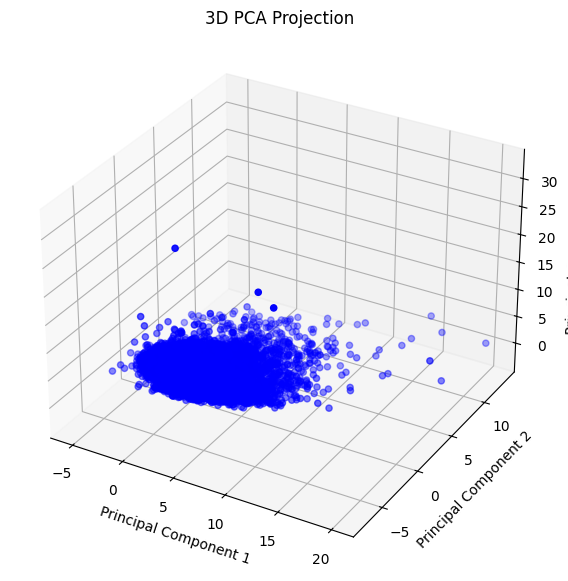

Explained variance by each component: [0.2987057  0.12710931 0.09711019]
Total explained variance: 0.5229252005136747
sqft_living      0.387681
sqft_above       0.376882
grade            0.360334
bathrooms        0.348644
sqft_living15    0.345326
price            0.298965
bedrooms         0.234539
floors           0.218493
yr_built         0.216976
long             0.158592
dtype: float64


In [9]:
# Plot the three-dimensional projection
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], c='blue', marker='o')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.title('3D PCA Projection')
plt.show()

# Evaluate the explained variance ratio
explained_variance = pca.explained_variance_ratio_
print(f'Explained variance by each component: {explained_variance}')
print(f'Total explained variance: {explained_variance.sum()}')

# Get the loading scores for the first principal component
loading_scores = pd.Series(pca.components_[0], index=df.columns)
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
top_10_features = sorted_loading_scores[0:10].index.values
print(loading_scores[top_10_features])

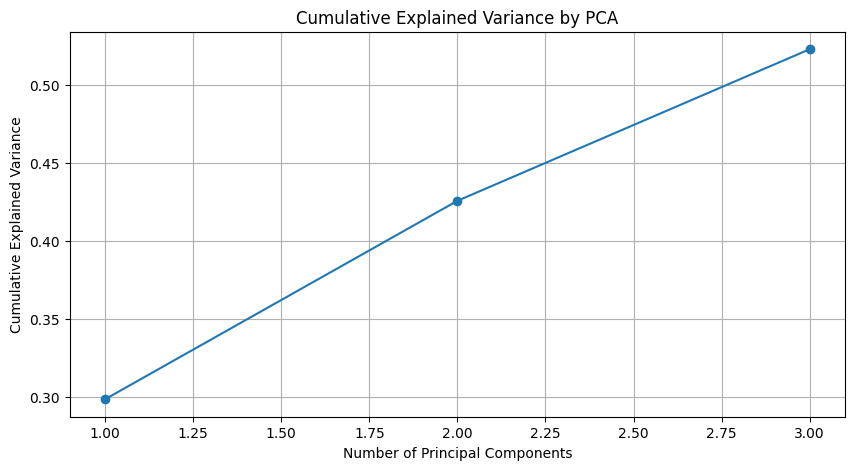

Cumulative explained variance does not reach 95.0%. Retaining all components.


In [10]:
# Calculate cumulative explained variance
cumulative_explained_variance = pca.explained_variance_ratio_.cumsum()

# Plot cumulative explained variance
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by PCA')
plt.grid(True)
plt.show()

# Determine the number of components to retain
desired_variance = 0.95
try:
	num_components = next(i for i, total_var in enumerate(cumulative_explained_variance) if total_var >= desired_variance) + 1
	print(f'Number of components to retain for {desired_variance * 100}% variance: {num_components}')
except StopIteration:
	print(f'Cumulative explained variance does not reach {desired_variance * 100}%. Retaining all components.')
	num_components = len(cumulative_explained_variance)

I disagree with the conclusion of my colleague based only on the reconstruction error. Although the reconstruction error decreases as the number of clusters increases, it does not mean that more clusters are better.

The first reason is overfitting, as shown above, where each cluster captures noise instead of meaningful patterns. The second reason is that the results can be hard to interpret when there are a large number of clusters.

A common heuristic method for determining the optimal number of clusters is the elbow method, which denotes a point at which further increases are not significantly lowering the error. It balances the reduction in error with simplicity.

Domain knowledge also matters. For example, if the data is talking about segments of customers, too many segments might be intractable for business strategy.

So although the error is lower with 10 clusters, it doesn't mean this is the best number. Other parameters should be taken into account in order to figure out the best number of clusters.


### Scree Plot

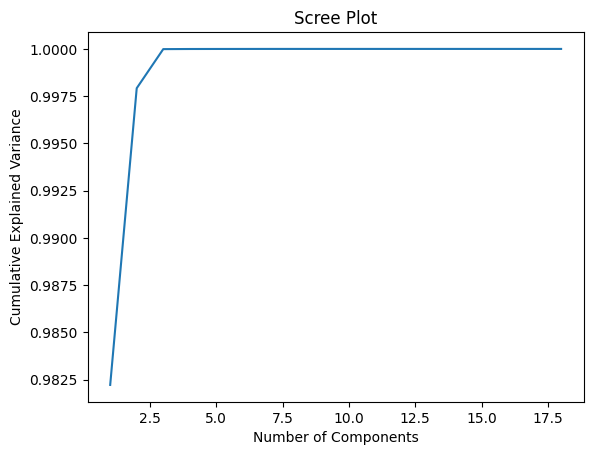

In [11]:
# Calculate explained variance ratios for different numbers of components
explained_variance_ratios = []
for n_components in range(1, len(df.columns)):
    pca.n_components = n_components
    pca.fit(df)
    explained_variance_ratios.append(sum(pca.explained_variance_ratio_))

# Create scree plot
plt.plot(range(1, len(df.columns)), explained_variance_ratios)
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Scree Plot")
plt.show()

### Cross-validation

In [12]:
# Determine the number of components to retain
desired_variance = 0.95
try:
    num_components = next(i for i, total_var in enumerate(cumulative_explained_variance) if total_var >= desired_variance) + 1
    print(f'Number of components to retain for {desired_variance * 100}% variance: {num_components}')
except StopIteration:
    print(f'Cumulative explained variance does not reach {desired_variance * 100}%. Retaining all components.')
    num_components = len(cumulative_explained_variance)

Cumulative explained variance does not reach 95.0%. Retaining all components.


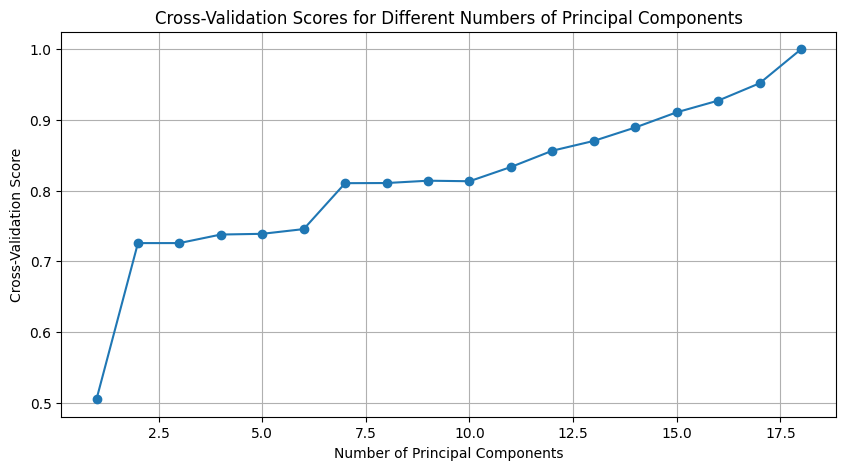

In [13]:
# Cross-validation to evaluate the performance with different numbers of components
explained_variance_ratios = []
cross_val_scores = []

for n_components in range(1, len(df.columns)):
    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(scaled_df)
    
    # Use linear regression for cross-validation
    model = LinearRegression()
    scores = cross_val_score(model, pca_result, df.iloc[:, 0], cv=5)  # Assuming the first column is the target variable
    explained_variance_ratios.append(sum(pca.explained_variance_ratio_))
    cross_val_scores.append(scores.mean())

# Plot cross-validation scores
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(df.columns)), cross_val_scores, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cross-Validation Score')
plt.title('Cross-Validation Scores for Different Numbers of Principal Components')
plt.grid(True)
plt.show()

Based on the graph, the appropriate minimum dimensionality to project the data to would likely be around **7**. 
Using more components might lead to overfitting and not contribute much to improvement in model